# IRIS CLASSIFICATION


# IMPORTING LIBRARIES

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle


# LOADING DATASET

In [31]:
data = pd.read_csv('C:\\Users\\HP\\Desktop\\DS_ML\\Iris.csv')
data.drop(['Id'],axis=1, inplace=True)
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
#Assigning respective features to x(independent features) and y(dependent feature)
x = data.iloc[:, [0,1,2,3]].values
y = data.iloc[:, 4].values


# DATA PREPROCESSING

In [33]:
data.isnull().sum()  #no null values in colums

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [34]:
data[data.isnull().any(axis=1)] #no null values along rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


# EXPLORATORY DATA ANALYSIS

In [35]:
data.shape

(150, 5)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
data["Species"].value_counts() # Count values for each flower species
#the data distribution among setosa, virginica, versicolor are equal so iris dataset is a Balanced dataset

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

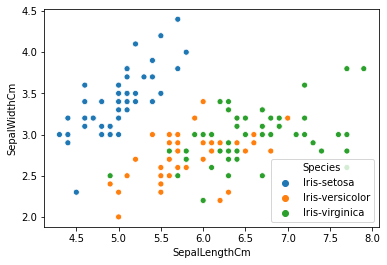

In [39]:
sns.scatterplot('SepalLengthCm' , 'SepalWidthCm' , data = data,  hue= 'Species') 
# using  SepalLenght and SepalWidth we can distinguish setosa from other two species

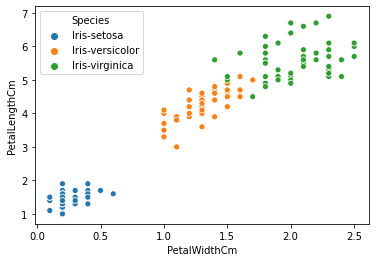

In [40]:
sns.scatterplot('PetalWidthCm' , 'PetalLengthCm' , data = data,  hue= 'Species') 
# using  PetalLenght and PetalWidth we can distinguish all three species seperately 

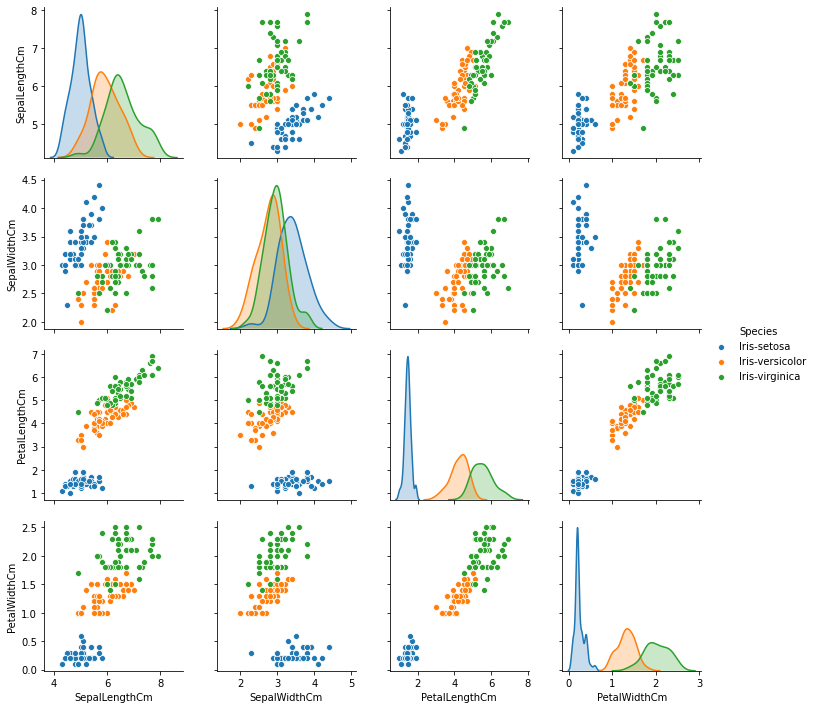

In [81]:
sns.pairplot(data,hue='Species')

In [41]:
#Finding out the correlation between the features
corr = data.corr()
print(corr)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


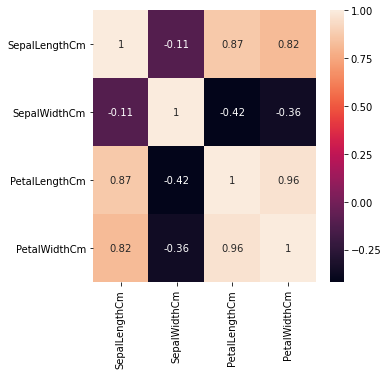

In [42]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True)

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


# FEATURE SCALING

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# KNN MODEL 

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# PREDICTION AND EVALUATION

In [100]:
yp = knn.predict(x_test)

In [101]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,yp))

[[16  0  0]
 [ 0 16  2]
 [ 0  1 10]]


In [102]:
print(classification_report(y_test,yp))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.93        45
      macro avg       0.92      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



# CHOOSING K-Value

In [103]:
error_rate =[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    yp = knn.predict(x_test)
    error_rate.append(np.mean(yp != y_test))

Text(0, 0.5, 'Error Rate')

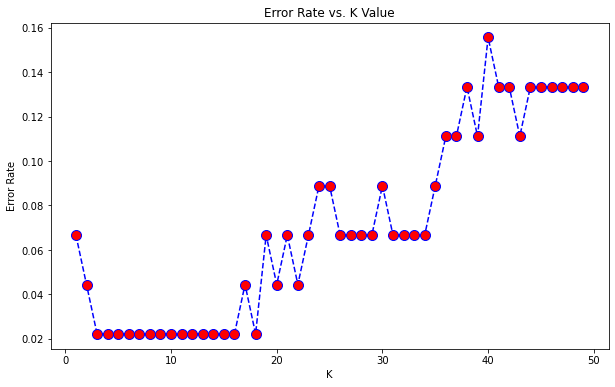

In [104]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# MODEL WITH NEW K-Value

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

# PREDICTION AND EVALUATION

In [111]:
yp = knn.predict(x_test)

In [112]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,yp))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [113]:
print(classification_report(y_test,yp))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

